# Improving Credit Risk Scorecards with GenAI Methods
---

The demo is as follows:
* Load credit data
* Explore it
* Perform binning/transformations
* Build models using scikit-learn and SAS logistic regression methods
* Create a new SAS logistic regression model on synthetic data
* Register to Model Manager

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit_data = pd.read_csv('/workspaces/myfolder/data/lendingClubLoanData.csv')
credit_data.rename(columns={"CredLineAge": "CreditLineAge"}, inplace=True)
credit_data.columns

Index(['CreditPolicy', 'Purpose', 'InterestRate', 'Installment',
       'LogAnnualInc', 'DebtIncRatio', 'FICOScore', 'CreditLineAge',
       'RevBalance', 'RevUtilization', 'Inquiries6Mnths', 'Delinquencies2Yrs',
       'PublicRecord', 'Default'],
      dtype='object')

In [3]:
credit_data.shape

(9578, 14)

In [4]:
credit_data['Default'].value_counts()

Default
0    8045
1    1533
Name: count, dtype: int64

In [5]:
credit_data.describe()

,CreditPolicy,InterestRate,Installment,LogAnnualInc,DebtIncRatio,FICOScore,CreditLineAge,RevBalance,RevUtilization,Inquiries6Mnths,Delinquencies2Yrs,PublicRecord,Default
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


array([[<Axes: title={'center': 'CreditPolicy'}>,
        <Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'Installment'}>,
        <Axes: title={'center': 'LogAnnualInc'}>],
       [<Axes: title={'center': 'DebtIncRatio'}>,
        <Axes: title={'center': 'FICOScore'}>,
        <Axes: title={'center': 'CreditLineAge'}>,
        <Axes: title={'center': 'RevBalance'}>],
       [<Axes: title={'center': 'RevUtilization'}>,
        <Axes: title={'center': 'Inquiries6Mnths'}>,
        <Axes: title={'center': 'Delinquencies2Yrs'}>,
        <Axes: title={'center': 'PublicRecord'}>],
       [<Axes: title={'center': 'Default'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

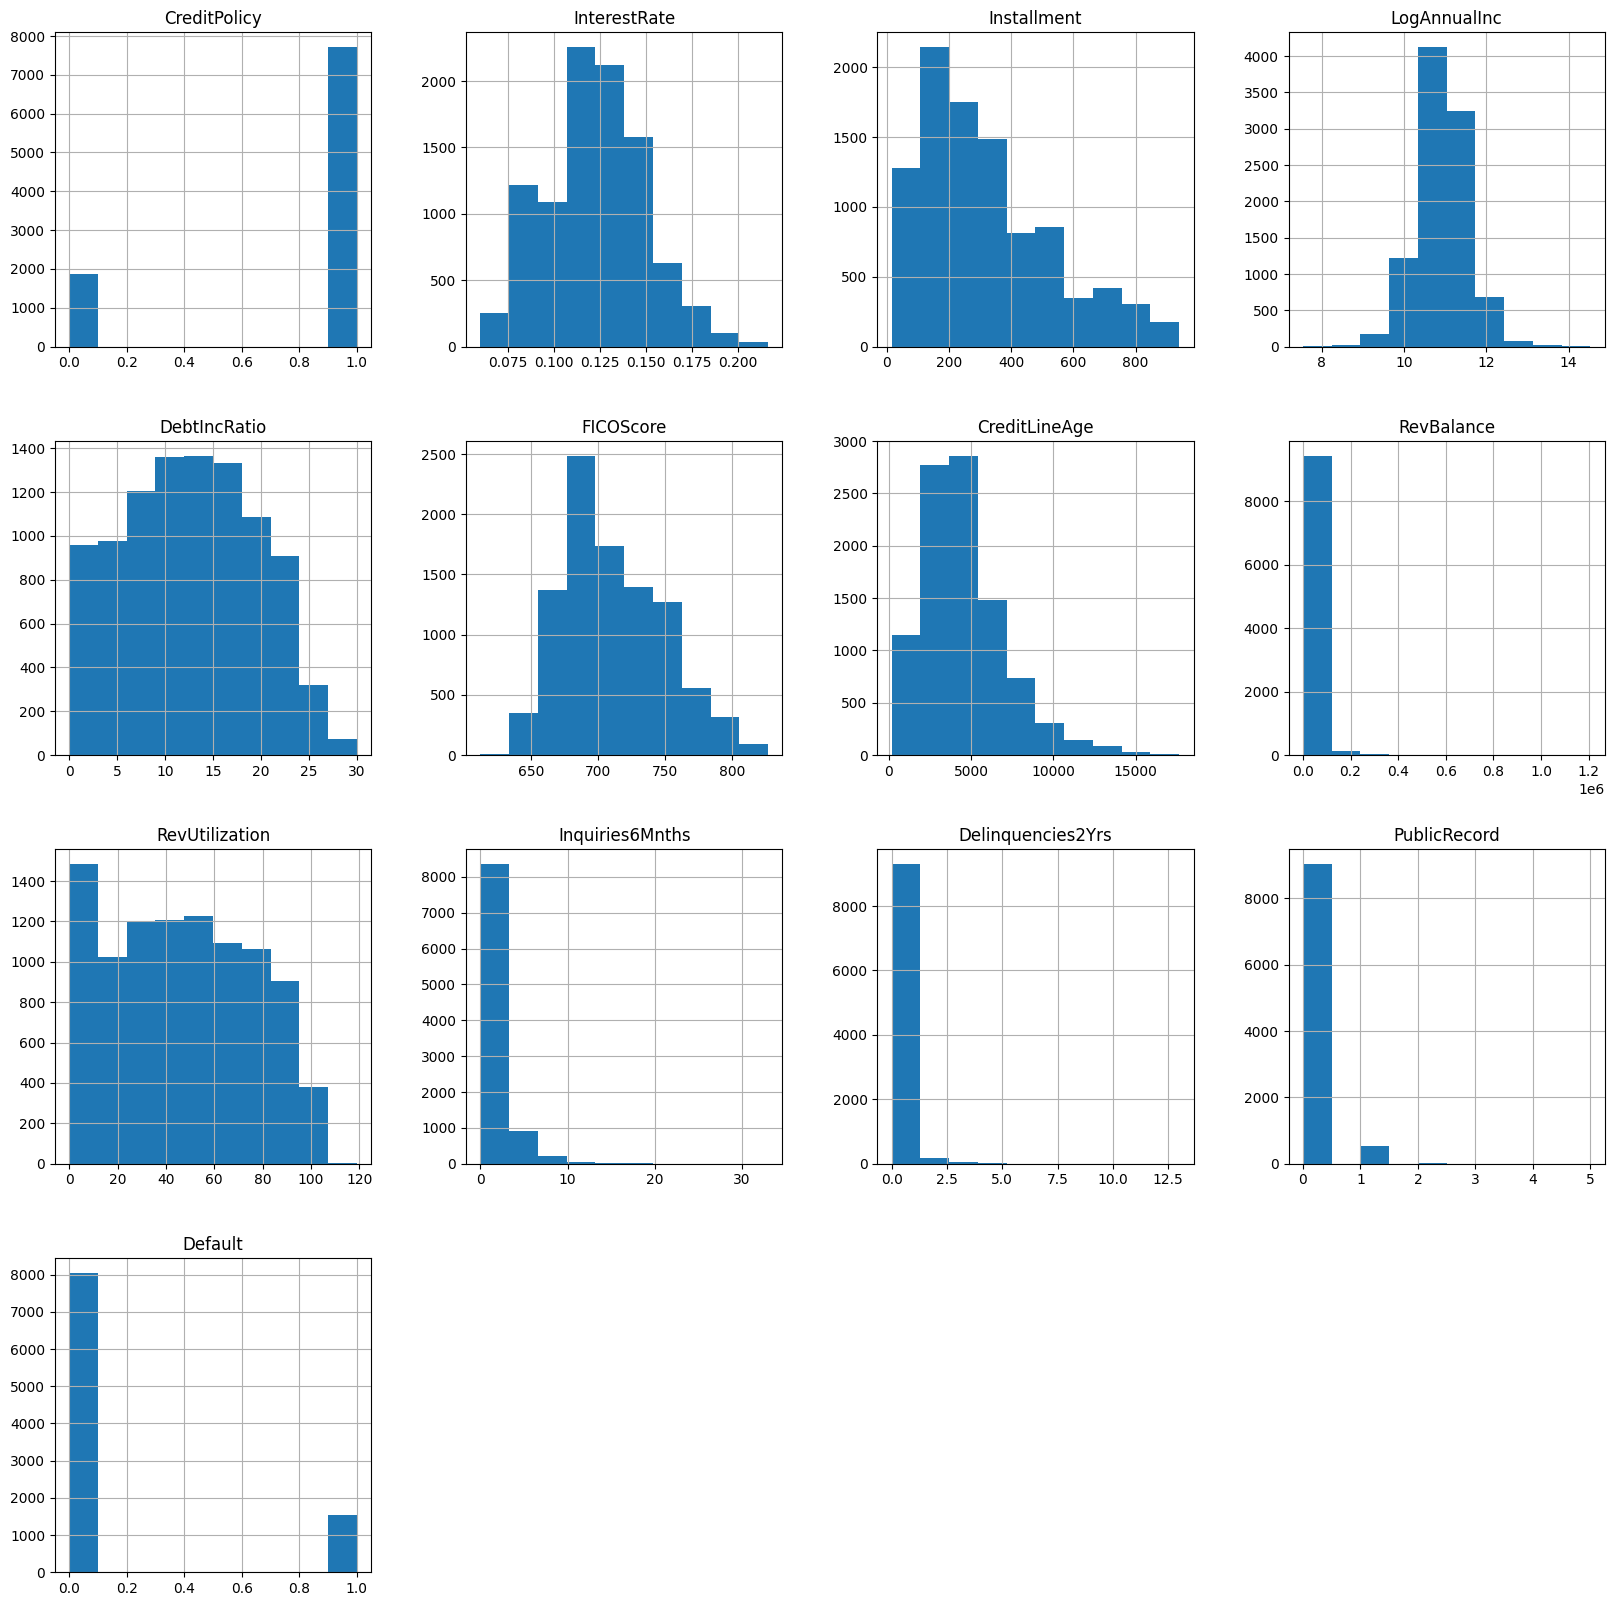

In [6]:
credit_data.hist(figsize=(20,20))

In [7]:
from data_preprocess import woe_binning, fetch

In [8]:
# Set Up Inputs and Target
nominal_inputs = ['Purpose']
cont_inputs = ['CreditPolicy', 'InterestRate', 'Installment',
                'LogAnnualInc', 'DebtIncRatio', 'FICOScore',
                'CreditLineAge', 'RevBalance', 'RevUtilization',
                'Inquiries6Mnths', 'Delinquencies2Yrs', 'PublicRecord']
target = 'Default'

In [9]:
woe_transform = woe_binning(credit_data, nominal_inputs, cont_inputs, target)
woe_transform

[TransInfo]

                                Transformation Requests for credit_data                                
 
          Name  NTransVars  NEvalVars DisctMethod CatTransMethod             WoeDef  WoeAdjust  IVFactor
 req_intervals          12          1         WOE           None Non-event by event        0.5       2.0
  req_nominals           1          1        None            WOE Non-event by event        0.5       2.0

[VarTransInfo]

                              Variable Transformation Information for credit_data                              
 
          Variable Transformation EvalVar             ResultVar    N  NMiss  NBins       IV    WOESum  GiniIndex
     CreditLineAge            woe Default     woe_CreditLineAge 9578      0    7.0 0.051601 -0.052178   0.086313
      CreditPolicy            woe Default      woe_CreditPolicy 9578      0    2.0 0.318636 -0.472826   0.170870
      DebtIncRatio            woe Default      woe_DebtIncRatio 9578      0    7.0 0.034520  0.356557   0.072324
 Delinquencies2Yrs            woe Default woe_Delinquencies2Yrs 9578      0    2.0 0.003173 -0.092431   0.013000
         FICOScore            woe Default         woe_FICOScore 9578      0    7.0 0.396194  1.266230   0.230320
   Inquiries6Mnths            woe Default   woe_Inquiries6Mnths 9578      0    5.0 0.314849 -0.737692   0.201602
       Installment            woe Default       woe_Installment 9578      0    7.0 0.084850 -0.385068   0.107556
      InterestRate            woe Default      woe_InterestRate 9578      0    7.0 0.495550  0.856365   0.242861
      LogAnnualInc            woe Default      woe_LogAnnualInc 9578      0    7.0 0.055499 -0.284088   0.088878
      PublicRecord            woe Default      woe_PublicRecord 9578      0    2.0 0.043947 -0.501862   0.037689
        RevBalance            woe Default        woe_RevBalance 9578      0    4.0 0.032329 -0.245450   0.045192
    RevUtilization            woe Default    woe_RevUtilization 9578      0    7.0 0.151540  0.474550   0.148548
           Purpose            woe Default           woe_Purpose 9578      0    5.0 0.134019 -0.451988   0.124382

[NomVarInfo]

Nominal Variable Information for credit_data
 
 Variable      N  NMiss  NLevels
  Default 9578.0    0.0      2.0
  Purpose 9578.0    0.0      7.0

[BinDetails]

                                                                                  Bin Details for credit_data                                                                                   
 
          Variable Transformation  BinId  BinLowerBnd  BinUpperBnd     BinWidth  NLevelsInBin  NInBin         Mean          Std          Min          Max  NEvents  NNonEvents       WOE       IV
     CreditLineAge            woe      1   178.958333 1.401228e+03 1.222270e+03           NaN     523   958.270794   332.715961   178.958333 1.394000e+03    113.0       410.0 -0.369055 0.016791
     CreditLineAge            woe      2  1401.228333 2.274278e+03 8.730500e+02           NaN    1058  1852.457270   250.293049  1407.000000 2.267000e+03    181.0       877.0 -0.079814 0.001446
     CreditLineAge            woe      3  2274.278333 3.147328e+03 8.730500e+02           NaN    1300  2705.457532   252.905061  2279.041667 3.140042e+03    175.0      1125.0  0.202928 0.010424
     CreditLineAge            woe      4  3147.328333 4.369598e+03 1.222270e+03           NaN    2292  3735.582679   349.135667  3148.958333 4.358000e+03    401.0      1891.0 -0.106925 0.005673
     CreditLineAge            woe      5  4369.598333 6.115698e+03 1.746100e+03           NaN    2364  5144.797818   489.679173  4370.000000 6.095042e+03    352.0      2012.0  0.085429 0.003499
     CreditLineAge            woe      6  6115.698332 8.211018e+03 2.095320e+03           NaN    1242  7039.430019   586.937323  6119.000000 8.192042e+03    211.0      1031.0 -0.071398 0.001354
     CreditLineAge            woe      7  8211.018332 1.763996e+04 9.428940e+03           NaN     799 10309.922872  1872.976

In [10]:
fetch("woe_transform", 5, 5)

_Index_,Default,woe_CreditLineAge,woe_CreditPolicy,woe_DebtIncRatio,woe_Delinquencies2Yrs,woe_FICOScore,woe_Inquiries6Mnths,woe_Installment,woe_InterestRate,woe_LogAnnualInc,woe_PublicRecord,woe_RevBalance,woe_RevUtilization,woe_Purpose
1,0.0,0.085429,0.229783,-0.192123,0.014796,0.126043,0.359418,-0.524365,0.105575,0.094388,0.040583,0.008954,-0.261167,0.058168
2,0.0,-0.106925,0.229783,0.180455,-0.107227,-0.404546,0.359418,0.233026,-0.438926,0.094388,0.040583,0.040092,0.058712,0.385060
3,0.0,-0.106925,0.229783,-0.035357,0.014796,-0.129117,0.068201,-0.014437,0.105575,0.094388,0.040583,-0.363167,0.058712,-0.148709
4,0.0,-0.071398,0.229783,0.180455,0.014796,0.827082,0.359418,0.018073,0.866112,0.094388,0.040583,0.040092,0.379058,0.058168
5,0.0,-0.106925,0.229783,0.215303,0.014796,-0.404546,0.359418,-0.014437,-0.126672,-0.073598,0.040583,0.040092,-0.362195,-0.043746


In [11]:
var_info_df = pd.DataFrame(woe_transform.VarTransInfo)
var_info_df.sort_values(by=['IV'], ascending=True, inplace=True)

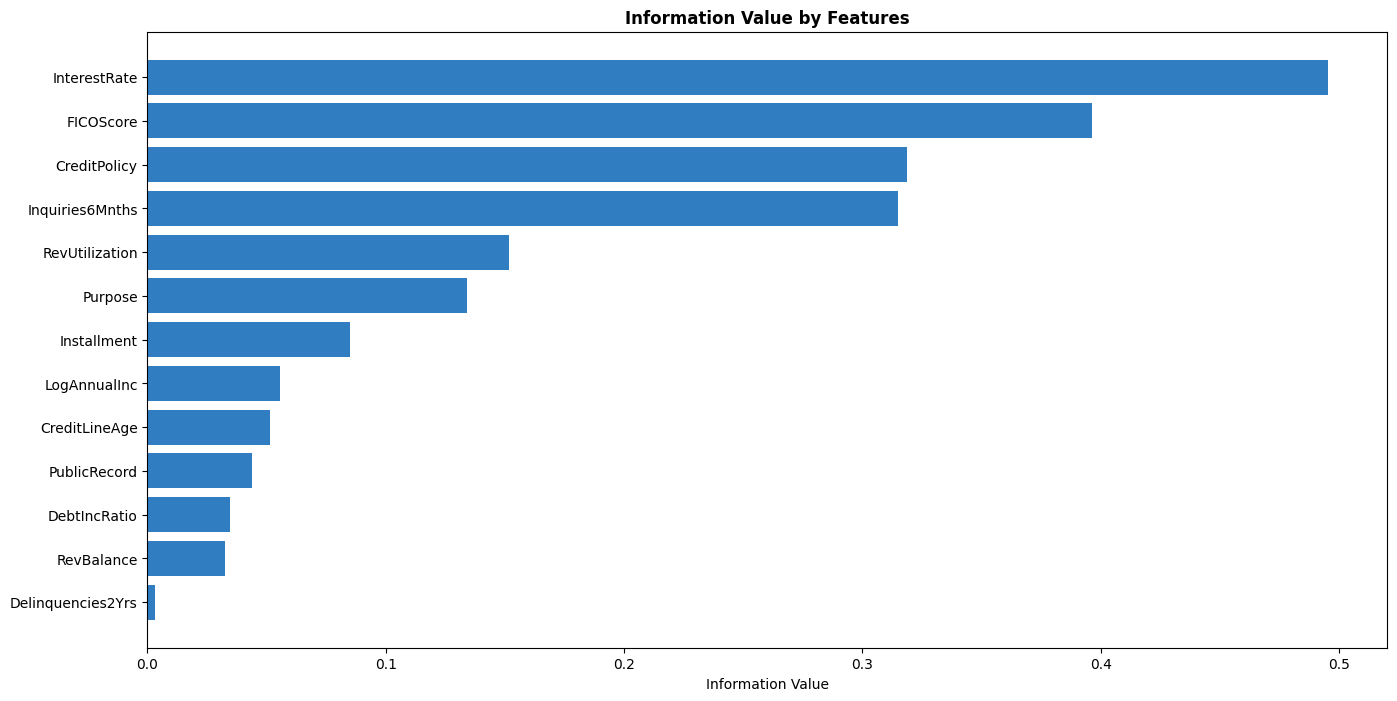

In [12]:
# Plot IV
plt.figure(figsize=(16,8))
plt.barh(var_info_df['Variable'], var_info_df['IV'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold");

In [13]:
woe_transform_credit_data = pd.DataFrame(fetch("woe_transform", len(credit_data), len(credit_data)).Fetch)

In [14]:
woe_transform_credit_data.columns

Index(['_Index_', 'Default', 'woe_CreditLineAge', 'woe_CreditPolicy',
       'woe_DebtIncRatio', 'woe_Delinquencies2Yrs', 'woe_FICOScore',
       'woe_Inquiries6Mnths', 'woe_Installment', 'woe_InterestRate',
       'woe_LogAnnualInc', 'woe_PublicRecord', 'woe_RevBalance',
       'woe_RevUtilization', 'woe_Purpose'],
      dtype='object')

In [15]:
# Convert Bin Details to Pandas DF for Plotting
woe_bin_credit_data = pd.DataFrame(woe_transform.BinDetails)

# Time on Job DF
woe_bin_purpose = woe_bin_credit_data[woe_bin_credit_data['Variable']=='Purpose']
woe_bin_credit_policy = woe_bin_credit_data[woe_bin_credit_data['Variable']=='CreditPolicy']
# woe_bin_cash = woe_bin_credit_data[woe_bin_credit_data['Variable']=='CASH']
# woe_bin_prof = woe_bin_credit_data[woe_bin_credit_data['Variable']=='PROF']

Text(0, 0.5, 'WOE Value')

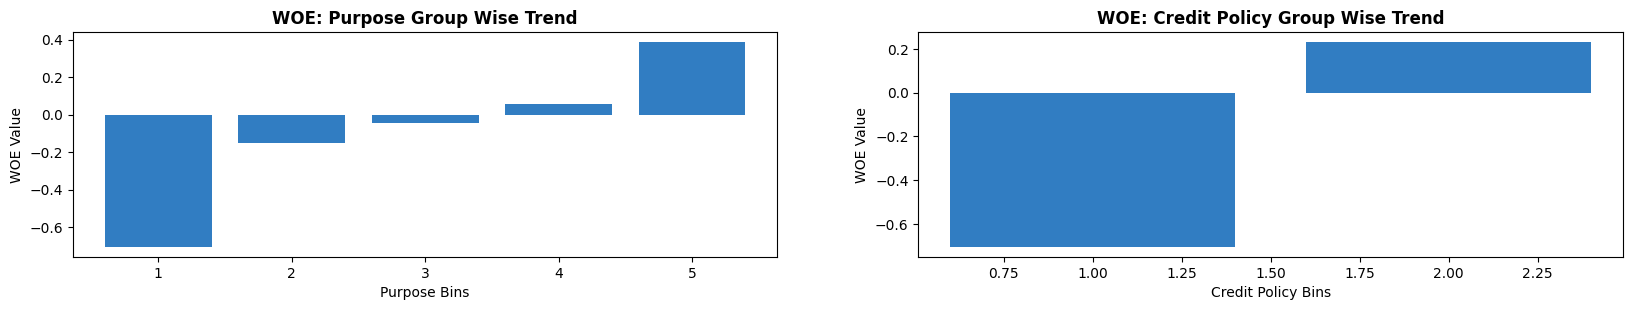

In [16]:
# Plot Examples -  WoE value is a measure of the "strength” of a grouping for separating good and bad credit
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=.4)

plt.subplot(2, 2, 1)
plt.bar(woe_bin_purpose['BinId'], woe_bin_purpose['WOE'], color = '#317DC2')
plt.title('WOE: Purpose Group Wise Trend', fontweight="bold")
plt.xlabel('Purpose Bins')
plt.ylabel('WOE Value')

plt.subplot(2, 2, 2)
plt.bar(woe_bin_credit_policy['BinId'], woe_bin_credit_policy['WOE'], color = '#317DC2')
plt.title('WOE: Credit Policy Group Wise Trend', fontweight="bold")
plt.xlabel('Credit Policy Bins')
plt.ylabel('WOE Value')

# plt.subplot(2, 2, 3)
# plt.bar(woe_bin_prof['BinId'], woe_bin_prof['WOE'], color = '#317DC2')
# plt.title('WOE: Profession Group Wise Trend', fontweight="bold")
# plt.xlabel('Profession Bins')
# plt.ylabel('WOE Value')

# plt.subplot(2, 2, 4)
# plt.bar(woe_bin_toj['BinId'], woe_bin_toj['WOE'], color = '#317DC2')
# plt.title('WOE: Time at Job Group Wise Trend', fontweight="bold")
# plt.xlabel('Time at Job Bins')
# plt.ylabel('WOE Value');

In [17]:
woe_input = woe_transform_credit_data.drop(['_Index_', 'Default'], axis=1)

In [18]:
## Split out holdout
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    woe_input, woe_transform_credit_data['Default'], test_size=0.1, random_state=0)

In [19]:
import sklearn.linear_model as scikitlg

In [20]:
sklg = scikitlg.LogisticRegression()
sklg.fit(X = X_train, y = y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
def calculate_gini(y, x):
    auc = roc_auc_score(y, x)
    gini = 2 * auc - 1
    return gini

In [23]:
sklg_train_auc = roc_auc_score(y_train, sklg.predict_proba(X_train)[:,1])
sklg_train_gini = 2 * sklg_train_auc - 1
print(sklg_train_auc, sklg_train_gini)

0.6935480053969075 0.38709601079381506


In [24]:
sklg_test_auc = roc_auc_score(y_test, sklg.predict_proba(X_test)[:,1])
sklg_test_gini = 2 * sklg_test_auc - 1
print(sklg_test_auc, sklg_test_gini)

0.6704440812669549 0.34088816253390974


In [25]:
from sasviya.ml.linear_model import LogisticRegression

In [26]:
saslg = LogisticRegression()
saslg.fit(X = X_train, y = y_train)

LogisticRegression()

In [27]:
saslg_train_auc = roc_auc_score(y_train, saslg.predict_proba(X_train).to_numpy()[:,1])
saslg_train_gini = 2 * saslg_train_auc - 1
print(saslg_train_auc, saslg_train_gini)

0.6936332806903185 0.387266561380637


In [28]:
saslg_test_auc = roc_auc_score(y_test, saslg.predict_proba(X_test).to_numpy()[:,1])
saslg_test_gini = 2 * saslg_test_auc - 1
print(saslg_test_auc, saslg_test_gini)

0.6700292846417402 0.3400585692834803


#### Gradient Boosting

In [29]:
import sklearn.ensemble as scikitgb
from sasviya.ml.tree import GradientBoostingClassifier

In [30]:
skgb = scikitgb.GradientBoostingClassifier()
skgb.fit(X = X_train, y = y_train)

GradientBoostingClassifier()

In [31]:
skgb_train_gini = calculate_gini(y_train, skgb.predict_proba(X_train)[:,1])
skgb_test_gini = calculate_gini(y_test, skgb.predict_proba(X_test)[:,1])

In [32]:
sasgb = GradientBoostingClassifier()
sasgb.fit(X = X_train, y = y_train)

GradientBoostingClassifier()

In [33]:
sasgb_train_gini = calculate_gini(y_train, sasgb.predict_proba(X_train).to_numpy()[:,1])
sasgb_test_gini = calculate_gini(y_test, sasgb.predict_proba(X_test).to_numpy()[:,1])

In [34]:
model_comparison = pd.DataFrame(
    {'Scikit-Learn Logreg': [sklg_train_gini, sklg_test_gini], 
    'SAS Logreg': [saslg_train_gini, saslg_test_gini],
    'Scikit-Learn GBM': [skgb_train_gini, skgb_test_gini],
    'SAS GBM': [sasgb_train_gini, sasgb_test_gini]},
    ["Train", "Test"])
model_comparison

,Scikit-Learn Logreg,SAS Logreg,Scikit-Learn GBM,SAS GBM
Train,0.387096,0.387267,0.483249,0.564753
Test,0.340888,0.340059,0.326611,0.317212


## Train with Synthetic Data

In [35]:
synthetic_credit_data = pd.read_csv("/workspaces/myfolder/data/LendingClubLoan_SDM_1M.csv")
synthetic_credit_data.rename(columns={"CredLineAge": "CreditLineAge"}, inplace=True)
synthetic_credit_data.head(n=10)

,CreditPolicy,Purpose,InterestRate,Installment,LogAnnualInc,DebtIncRatio,FICOScore,CreditLineAge,RevBalance,RevUtilization,Inquiries6Mnths,Delinquencies2Yrs,PublicRecord,Default
0,1,debt_consolidation,0.1265,314.98,11.469610,8.74,702,4136.84858,8658,75.6,0,0,0,1
1,1,debt_consolidation,0.1063,207.84,9.977308,9.66,742,4470.03192,6134,51.3,1,0,0,1
2,1,all_other,0.1343,169.54,10.860380,3.25,747,3627.37205,9,0.1,0,0,0,1
3,0,debt_consolidation,0.1313,71.93,10.042653,2.38,655,1826.19979,1113,24.2,4,2,0,1
4,0,debt_consolidation,0.1106,200.95,10.104707,14.76,730,5613.32106,2708,10.1,2,1,0,1
5,1,debt_consolidation,0.1356,185.78,10.811018,8.70,703,6414.36732,11444,64.6,2,1,0,1
6,0,small_business,0.1165,687.52,11.922338,7.53,697,5268.03980,16243,79.7,6,0,0,1
7,1,all_other,0.1092,231.47,11.350616,6.87,712,6751.00467,17353,69.0,1,0,0,1
8,1,debt_consolidation,0.1051,325.17,10.464730,10.92,720,5589.15142,9016,37.0,1,0,0,1
9,1,debt_consolidation,0.0926,277.16,10.618001,11.95,732,3488.36768,13430,66.6,0,0,0,1


In [36]:
### WOE binning
# Set Up Inputs and Target
nominal_inputs = ['Purpose']
cont_inputs = ['CreditPolicy', 'InterestRate', 'Installment',
                'LogAnnualInc', 'DebtIncRatio', 'FICOScore',
                'CreditLineAge', 'RevBalance', 'RevUtilization',
                'Inquiries6Mnths', 'Delinquencies2Yrs', 'PublicRecord']
target = 'Default'

In [37]:
syn_woe_transform = woe_binning(synthetic_credit_data, nominal_inputs, cont_inputs, target)

In [38]:
syn_woe_transform_credit_data = pd.DataFrame(fetch("woe_transform", len(synthetic_credit_data), len(synthetic_credit_data)).Fetch)
syn_woe_transform_credit_data

,_Index_,Default,woe_CreditLineAge,woe_CreditPolicy,woe_DebtIncRatio,woe_Delinquencies2Yrs,woe_FICOScore,woe_Inquiries6Mnths,woe_Installment,woe_InterestRate,woe_LogAnnualInc,woe_PublicRecord,woe_RevBalance,woe_RevUtilization,woe_Purpose
0,1,1.0,-0.127053,0.230321,0.119382,0.015053,-0.200266,0.537321,0.080265,-0.153848,0.216636,0.040459,0.042673,-0.265931,0.059202
1,2,1.0,0.089447,-0.710679,0.030045,-0.108989,0.388610,-0.031631,0.113339,0.236923,-0.163336,0.040459,0.042673,0.544738,0.059202
2,3,1.0,0.089447,0.230321,0.119382,0.015053,0.083186,0.196990,0.080265,0.488627,-0.163336,0.040459,0.042673,0.025967,0.059202
3,4,1.0,-0.054577,0.230321,0.030045,0.015053,0.811729,-0.031631,-0.170546,0.236923,0.145070,0.040459,0.061241,0.025967,0.059202
4,5,1.0,-0.127053,0.230321,0.030045,0.015053,0.083186,0.196990,0.113339,0.236923,0.024754,0.040459,0.042673,0.025967,-0.047869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,0.0,-0.371063,-0.710679,0.119382,0.015053,-0.200266,-1.121245,-0.052338,0.488627,-0.572902,0.040459,0.042673,0.158174,0.377841
999996,999997,0.0,-0.371063,0.230321,0.119382,0.015053,-0.557031,-0.031631,0.113339,-0.153848,-0.049313,0.040459,0.042673,-0.265931,0.059202
999997,999998,0.0,0.160420,0.230321,-0.085988,0.015053,0.083186,-0.031631,-0.052338,0.488627,0.145070,0.040459,0.042673,0.025967,0.059202
999998,999999,0.0,0.160420,0.230321,0.119382,0.015053,0.388610,0.537321,0.204392,1.129423,-0.572902,0.040459,0.042673,0.213934,-0.047869


In [39]:
syn_woe_inputs = syn_woe_transform_credit_data.drop(['_Index_','Default'], axis=1)
syn_woe_inputs = syn_woe_inputs[X_test.columns.tolist()]

#### Model Training on Synthetic Data

Train Logistic Regressions and Gradient Boosting models on synthetic data and evaluate on holdout set

In [40]:
syn_sklg = scikitlg.LogisticRegression()
syn_sklg.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

LogisticRegression()

In [41]:
syn_saslg = LogisticRegression()
syn_saslg.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

LogisticRegression()

In [42]:
syn_sklg_train_gini = calculate_gini(syn_woe_transform_credit_data['Default'], syn_sklg.predict_proba(syn_woe_inputs)[:,1])
syn_sklg_test_gini = calculate_gini(y_test, syn_sklg.predict_proba(X_test)[:,1])

In [43]:
syn_saslg_train_gini = calculate_gini(syn_woe_transform_credit_data['Default'], syn_saslg.predict_proba(syn_woe_inputs).to_numpy()[:,1])
syn_saslg_test_gini = calculate_gini(y_test, syn_saslg.predict_proba(X_test).to_numpy()[:,1])

In [44]:
syn_skgb = scikitgb.GradientBoostingClassifier()
syn_skgb.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

GradientBoostingClassifier()

In [45]:
%%timeit -n 1 -r 1
syn_skgb = scikitgb.GradientBoostingClassifier()
syn_skgb.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

1min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
syn_skgb_train_gini = calculate_gini(syn_woe_transform_credit_data['Default'], syn_skgb.predict_proba(syn_woe_inputs)[:,1])
syn_skgb_test_gini = calculate_gini(y_test, syn_skgb.predict_proba(X_test)[:,1])

In [47]:
syn_sasgb = GradientBoostingClassifier()
syn_sasgb.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

GradientBoostingClassifier()

In [48]:
%%timeit -n 1 -r 1
syn_sasgb = GradientBoostingClassifier()
syn_sasgb.fit(X = syn_woe_inputs, y = syn_woe_transform_credit_data['Default'])

6.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
syn_sasgb_train_gini = calculate_gini(syn_woe_transform_credit_data['Default'], syn_sasgb.predict_proba(syn_woe_inputs).to_numpy()[:,1])
syn_sasgb_test_gini = calculate_gini(y_test, syn_sasgb.predict_proba(X_test).to_numpy()[:,1])

In [50]:
syn_model_comparison = pd.DataFrame(
    {'Scikit-Learn Logreg': [syn_sklg_train_gini, syn_sklg_test_gini], 
    'SAS Logreg': [syn_saslg_train_gini, syn_saslg_test_gini],
    'Scikit-Learn GBM': [syn_skgb_train_gini, syn_skgb_test_gini],
    'SAS GBM': [syn_sasgb_train_gini, syn_sasgb_test_gini]},
    ["Train", "Test"])
syn_model_comparison


,Scikit-Learn Logreg,SAS Logreg,Scikit-Learn GBM,SAS GBM
Train,0.425996,0.425997,0.486825,0.537974
Test,0.331879,0.331829,0.371558,0.370430


#### Comparing Model Performance on Holdout - Original Vs. Synthetic

In [51]:
performance_comparison = pd.DataFrame(
    {'Scikit-Learn Logreg': [sklg_test_gini, syn_sklg_test_gini, syn_sklg_test_gini - sklg_test_gini], 
    'SAS Logreg': [saslg_test_gini, syn_saslg_test_gini, syn_saslg_test_gini - saslg_test_gini],
    'Scikit-Learn GBM': [skgb_test_gini, syn_skgb_test_gini, syn_skgb_test_gini - skgb_test_gini],
    'SAS GBM': [sasgb_test_gini, syn_sasgb_test_gini, syn_sasgb_test_gini - sasgb_test_gini]},
    ["Original", "Synthetic", "Gini Change"])
performance_comparison

,Scikit-Learn Logreg,SAS Logreg,Scikit-Learn GBM,SAS GBM
Original,0.340888,0.340059,0.326611,0.317212
Synthetic,0.331879,0.331829,0.371558,0.370430
Gini Change,-0.009009,-0.008230,0.044947,0.053218


### Create Scorecard

Using the logistic regression parameters and estimates, we create our scorecard and score all of the entries

In [52]:
# Parameter Table from Logistic Regression
lr_woe_mod_params = pd.DataFrame(syn_saslg.details_.ParameterEstimates)
lr_woe_mod_params = lr_woe_mod_params[['Parameter','Estimate']]
# Since event level selected was the oppposite
lr_woe_mod_params['Estimate'] = lr_woe_mod_params['Estimate'] * - 1
# lr_woe_mod_params

In [53]:
# Intercept
intercept = lr_woe_mod_params['Estimate'][0]

# Drop Intercept
lr_woe_mod_params_est = lr_woe_mod_params[lr_woe_mod_params['Parameter'] != 'Intercept']

In [54]:
woe_transform_credit_data = woe_transform_credit_data.fillna(0)
# woe_transform_credit_data.head()

In [55]:
# Filter WOE Transform Table to Only Selected Features from Logistic Regression
selected_params = lr_woe_mod_params_est['Parameter']

woe_transform_credit_data_selected = woe_transform_credit_data[selected_params]

In [56]:
# Ensure Shapes are Correct for Matrix Multiplication
display(woe_transform_credit_data_selected.shape)
display(lr_woe_mod_params.shape)

(9578, 13)

(14, 2)

In [57]:
# Set Parameter Name as Index
lr_woe_mod_params_index = lr_woe_mod_params_est.set_index('Parameter')

In [58]:
# Multiply lr coefficients to observation WOE Values
scorecard = woe_transform_credit_data_selected[lr_woe_mod_params_index.index].apply(lambda x: x*lr_woe_mod_params_index['Estimate'].T,axis=1)

In [59]:
# Get Logit Values
scorecard['logit'] = scorecard[list(scorecard.columns)].sum(axis=1) + intercept

In [60]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [61]:
# Set up Scoring Logic
target_score = 600
target_odds = 30
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [62]:
# Score
scorecard['score'] = offset + factor * scorecard['logit']

In [63]:
# Add Back Customer ID and Target Features
scorecard[target] = woe_transform_credit_data[target]

In [64]:
# Remove Score Outliers (245, 0.156% of Total)
scorecard = scorecard[scorecard['score'] <= 600]

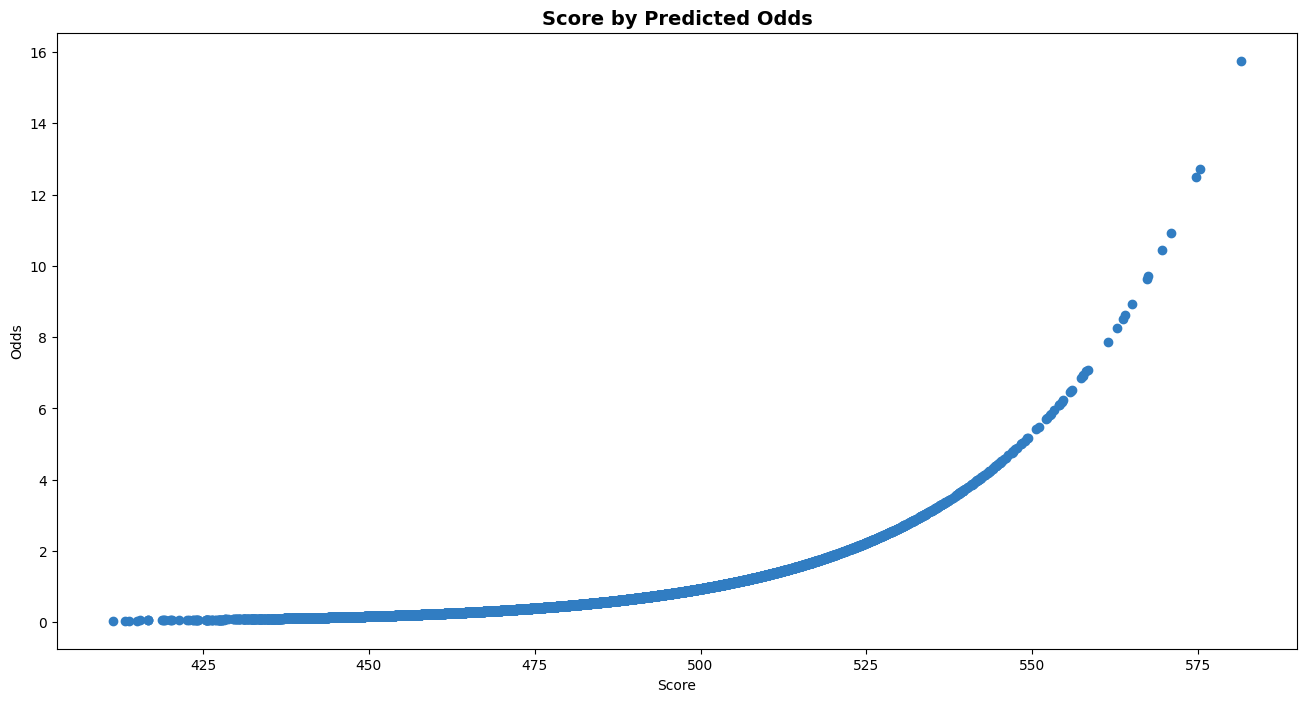

In [65]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');

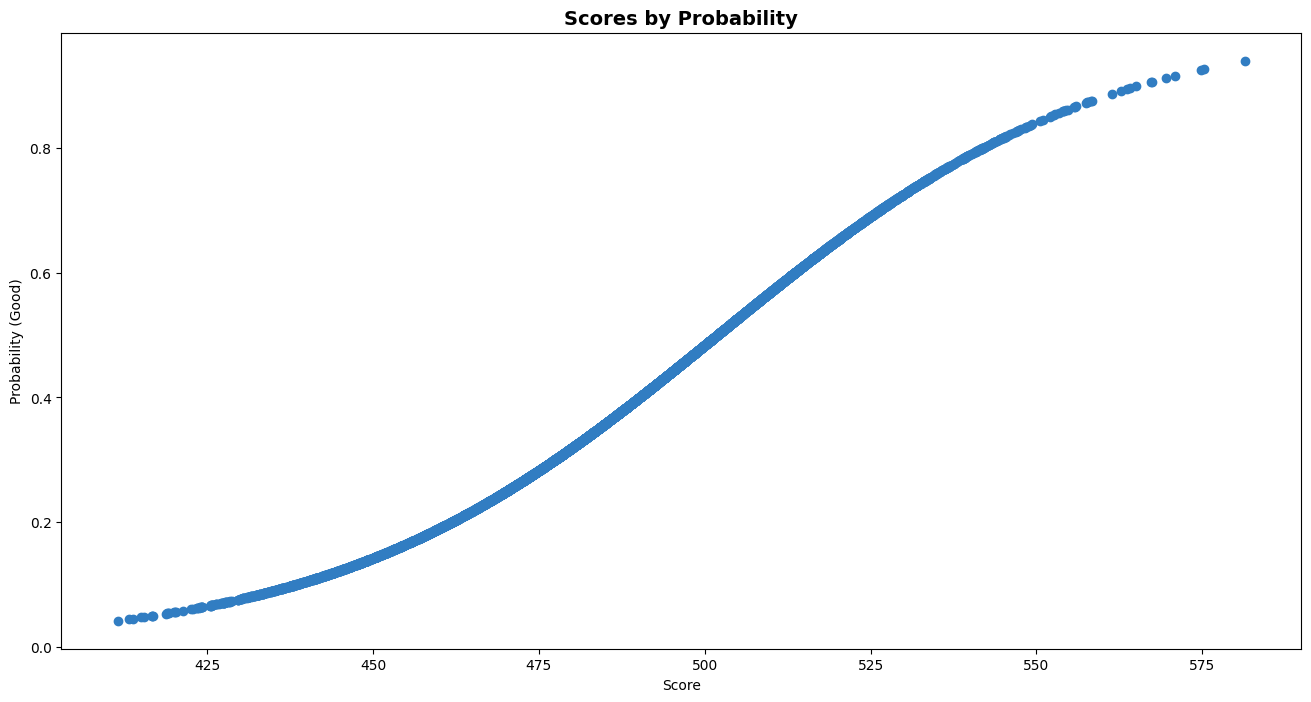

In [66]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

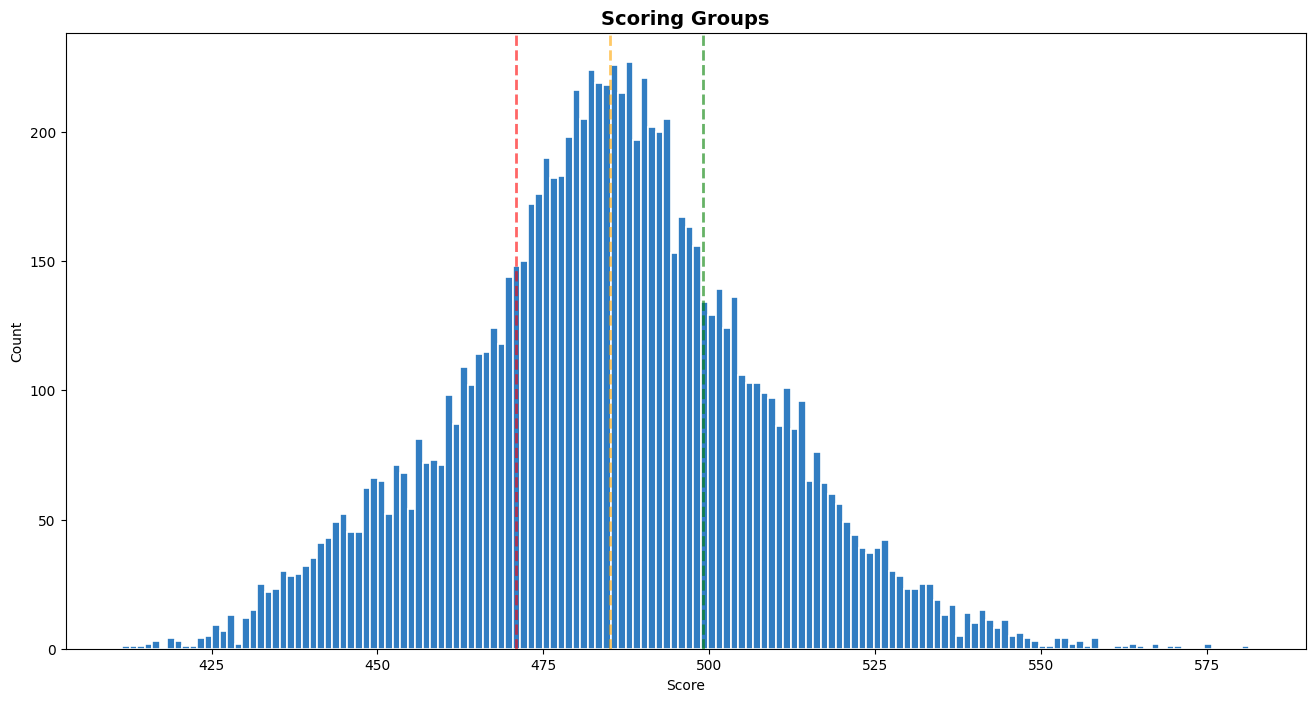

In [67]:
# Add Scoring Groups to Plot
plt.figure(figsize=(16,8))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

# plt.xlim(350,560)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(scorecard['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

#### Create Scorecard Points System

In [68]:
model_summary = lr_woe_mod_params.rename(
    columns={"Parameter": "Characteristic"}
)

In [69]:
model_summary['Characteristic'] = model_summary['Characteristic'].str.replace('woe_', '')
model_summary

,Characteristic,Estimate
0,Intercept,-0.407298
1,CreditLineAge,-0.475043
2,CreditPolicy,-0.021843
3,DebtIncRatio,-0.254554
4,Delinquencies2Yrs,0.438662
5,FICOScore,-0.552367
6,Inquiries6Mnths,-0.821462
7,Installment,-1.190979
8,InterestRate,-0.330898
9,LogAnnualInc,-1.173540


In [70]:
## Create a list of vars
var_list = model_summary['Characteristic'].tolist()

In [71]:
filtered_woe_bin_credit_data = woe_bin_credit_data[woe_bin_credit_data['Variable'].isin(var_list)]
filtered_woe_bin_credit_data = filtered_woe_bin_credit_data[['Variable', 'BinId', 'WOE']]
# filtered_woe_bin_credit_data

In [72]:
filtered_woe_bin_credit_data = filtered_woe_bin_credit_data.reset_index().drop(columns={'index'}).rename(columns={"Variable": "Characteristic"})
# filtered_woe_bin_credit_data

In [73]:
scorecard_pts = pd.merge(left = filtered_woe_bin_credit_data, right = model_summary, how='left', on=['Characteristic'])
# scorecard_pts

In [74]:
WOE = scorecard_pts['WOE']
beta = scorecard_pts['Estimate']

In [75]:
n = len(syn_saslg.coef_.columns)

In [76]:
scorecard_pts['Points'] = (offset/n) - factor*((intercept/n) + (beta*WOE))
scorecard_pts['Points'] = scorecard_pts['Points'].astype('int')

In [77]:
pd.set_option('display.max_rows', None)
print(scorecard_pts)


       Characteristic  BinId       WOE  Estimate  Points
0       CreditLineAge      1 -0.369055 -0.475043      34
1       CreditLineAge      2 -0.079814 -0.475043      38
2       CreditLineAge      3  0.202928 -0.475043      42
3       CreditLineAge      4 -0.106925 -0.475043      38
4       CreditLineAge      5  0.085429 -0.475043      40
5       CreditLineAge      6 -0.071398 -0.475043      38
6       CreditLineAge      7  0.286656 -0.475043      43
7        CreditPolicy      1 -0.702609 -0.021843      39
8        CreditPolicy      2  0.229783 -0.021843      39
9        DebtIncRatio      1  0.215303 -0.254554      41
10       DebtIncRatio      2  0.037101 -0.254554      39
11       DebtIncRatio      3  0.187442 -0.254554      40
12       DebtIncRatio      4 -0.036265 -0.254554      39
13       DebtIncRatio      5  0.180455 -0.254554      40
14       DebtIncRatio      6 -0.035357 -0.254554      39
15       DebtIncRatio      7 -0.192123 -0.254554      38
16  Delinquencies2Yrs      1  0

## Register Model to Model Manager

In [78]:
from sasctl import pzmm
from sasctl import Session
from sasctl.services import model_repository as mr, model_management as mm
from pathlib import Path
import requests
import os

In [79]:
## get access token for viya env using refresh token. change to your own viya server and preferred authentication method.
url = "https://apgtps2demo.gtp.unx.sas.com"
auth_url = f"{url}/SASLogon/oauth/token"
## reading long-lived refresh token from txt file
refresh_token = Path(f'/workspaces/{os.environ["DEFAULT_MOUNTNAME"]}/apgtps2demo_refresh_token.txt').read_text().replace('\n', '')

payload=f'grant_type=refresh_token&refresh_token={refresh_token}'
headers = {
  'Accept': 'application/json',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Authorization': 'Basic c2FzLmNsaTo=',
}

response = requests.request("POST", auth_url, headers=headers, data=payload, verify=False)
access_token = response.json()['access_token']

In [80]:
st = Session("https://apgtps2demo.gtp.unx.sas.com", token=access_token, verify_ssl=False)
st

In [81]:
repository = mr.get_repository('DMRepository')
repository.name

/usr/local/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apgtps2demo.gtp.unx.sas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'DMRepository'

In [82]:
project_name = "WB Lending Club Risk" 

In [83]:
try:
    project = mr.create_project(project_name, repository)
    project = mr.get_project(project_name)
except:
    project = mr.get_project(project_name)

In [84]:
def register_model(model_name, model, project):
    model_params = {
        "name": model_name,
        "projectId": project.id,
        "type": "ASTORE",
    }
    astore = mr.post(
        "/models",
        files={"files": (f"{model_name}.astore", model.export())},
        data=model_params,
    )
    

In [85]:
register_model("SASViyaML_LogisticRegression", syn_saslg, project)

In [86]:
register_model("SASViyaML_GradientBoosting", syn_sasgb, project)